## 회귀



In [18]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt
from IPython.display import Image



### 다음과 같은 종속 변수 Y와 두 개의 독립 변수 X1,X2를 갖고 있는 데이터가 있습니다. Regressing Tree를 통해 Y를 예측하고자 할 때, 처음으로 분할 되는 변수 및 분할 point를 찾아 주세요.

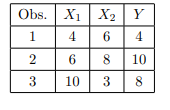

In [3]:
#Image("C:/Users/kdh2/Desktop/세션강의자료/2.png")

In [71]:
import os

os.environ['PATH'] += os.pathsep + r'C:\Users\winst\Anaconda3\Library\bin\graphviz'

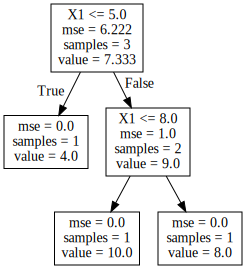

In [73]:
from sklearn.tree import DecisionTreeRegressor
import graphviz
from sklearn import tree
df = pd.DataFrame([[4,6,4],[6,8,10],[10,3,8]],columns=['X1','X2','Y'])
dtr = DecisionTreeRegressor()
dtr.fit(df[['X1','X2']],df['Y'])
dot_data=tree.export_graphviz(dtr,out_file=None,feature_names=['X1','X2'],class_names=['Y'])
graph=graphviz.Source(dot_data)
graph

X1 데이터 5를 기준으로 나눈다.

In [19]:
from sklearn.datasets import load_boston
boston = load_boston()
#보스톤 데이터셋은 범죄율, 강의 인접 유무, 세금 등 13개의 변수를 가지고 있으며, 주택 가격을 라벨 데이터로 가지고 있습니다

### <특징 데이터>
CRIM: 범죄율<br>
INDUS: 비소매상업지역 면적 비율<br>
NOX: 일산화질소 농도<br>
RM: 주택당 방 수<br>
LSTAT: 인구 중 하위 계층 비율<br>
B: 인구 중 흑인 비율<br>
PTRATIO: 학생/교사 비율<br>
ZN: 25,000 평방피트를 초과 거주지역 비율<br>
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0<br>
AGE: 1940년 이전에 건축된 주택의 비율<br>
RAD: 방사형 고속도로까지의 거리<br>
DIS: 직업센터의 거리<br>
TAX: 재산세율<br>

In [21]:
data = boston.data
label = boston.target
columns = boston.feature_names

In [23]:
data = pd.DataFrame(data, columns = columns)
label=pd.DataFrame(label,columns=['label'])

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(data,label,test_size=.2,random_state=42)
#변수를 split 해주세요


### DecisionTreeRegressor와 DecisionTreeClassifier를 쓰는 상황을 구분하여 작성 해주세요

- DecisionTreeRegressor : 타겟변수가 연속형일때

- DecisionTreeClassifier : 타겟변수가 범주형일 때

In [25]:
train_rm = train_x['RM']
test_rm = test_x['RM']

### Decision Tree Regressor


#### 1) x 변수로 'RM' 변수를, y 변수는 주택 가격으로 하여 회귀트리모델을 돌려주세요.<br>

In [26]:
#1) 트리의 max_depth는 5로 지정해주세요
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(max_depth=5)
#fit()을 이용하여 모델 학습
tree_reg.fit(train_rm.values.reshape(-1,1),train_y)
#예측값=
pred=tree_reg.predict(test_rm.values.reshape(-1,1))

#### 2) R<sup>2</sup> 으로 회귀 모델이 데이터를 잘 표현하는지 확인해주세요.
(R<sup>2</sup>값이 1에 가까울수록 회귀 모델이 데이터를 잘 표현한다는 것을 의미합니다.)

In [30]:
from sklearn.metrics import r2_score
r2_score(test_y,pred)

0.41445795523686113

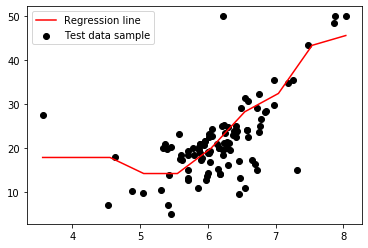

In [31]:
line_x = np.linspace(np.min(test_x['RM']), np.max(test_x['RM']), 10)
line_y = tree_reg.predict(line_x.reshape((-1, 1)))

plt.scatter(test_x['RM'].values.reshape((-1, 1)), test_y, c = 'black')
plt.plot(line_x, line_y, c = 'red')
plt.legend(['Regression line', 'Test data sample'], loc='upper left')

#### 변수 하나로는 R<sup>2</sup>값이 높지 않은 것을 확인하였습니다.
#### 3) 13개의 변수를 모두 사용해 결정 트리 회귀 모델을 사용해 보세요. 

In [34]:
#파라미터 조정 자유입니다. 
tree_reg2=DecisionTreeRegressor()
tree_reg2.fit(train_x,train_y)
pred = tree_reg2.predict(test_x)
r2_score(test_y,pred)

0.6972839424231276

# 분류

In [35]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

adult_path = join('adult_data', 'adult_data.csv')
column_path = join('adult_data', 'adult_names.txt')
adult_columns = list()
for l in open(column_path):
    adult_columns = l.split()

In [37]:
data = pd.read_csv(adult_path, names = adult_columns)
data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [38]:
label = data['income']
del data['income']
data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [39]:
label

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
48837    <=50K
48838    <=50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: object

In [40]:
data.shape

(48842, 14)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [42]:
# Pandas get_dummies 함수를 사용해 범주형 변수를 One-Hot Encoding하고, 라벨 데이터를 0,1 로 변경
data = pd.get_dummies(data)
label = label.map(lambda x : 0 if x =='>50K' else 1)
data
label.sum()


37155

## Cross Validation

In [43]:
from sklearn.model_selection import train_test_split

# (Train, Valid), Test 분할
X_train, X_test, y_train,y_test=train_test_split(data,label,test_size=0.2,random_state=785)

In [44]:
# Train, Valid 분할
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2,random_state=785)

In [50]:
#랜덤 포레스트로 모델을 학습시켜 주세요.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
# Valid 데이터로 검증
y_pred = rf.predict(X_valid)

print("랜덤 포레스트 검증 데이터 정확도 : {:.2f}%".format(accuracy_score(y_valid,y_pred)*100))

y_pred = rf.predict(X_test)
# Test 데이터로 모델 평가
print("랜덤 포레스트 테스트 데이터 정확도 : {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

랜덤 포레스트 검증 데이터 정확도 : 85.14%
랜덤 포레스트 테스트 데이터 정확도 : 85.62%


## Parameter Tuning
간단히 GridSearchCV 함수를 사용해 랜덤 포레스트의 n_estimator, max_depth 파라미터 중 가장 좋은 파라미터 조합을 찾아보겠습니다.<br>
GridSearchCV 함수는 Sklearn의 model_selection 패키지에 있습니다.<br>

In [52]:
from sklearn.model_selection import GridSearchCV


params = {
    'n_estimators':[100], 
    #n_estimators를 여러개로 주면 너무 느려서 한개로 했습니다. 여러개로 돌려보시고 더 높은 성능이 나오면 그것으로 해도 무방합니다
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}

#위의 리스트 값말고 다른값들로 돌려보았을 때 괜찮은 값 있으면 변경하셔도 됩니다.

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf = RandomForestClassifier()
grid_cv=GridSearchCV(rf,params)
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최고 예측 정확도: 0.8572


RandomForestClassifier(max_depth=12, min_samples_leaf=8, min_samples_split=20)

In [59]:
from sklearn.model_selection import cross_val_score

# 위에서 나온 최적 하이퍼 파라미터로 모델을 학습시켜 주세요.

best_rf = grid_cv.best_estimator_
best_rf.fit(X_train,y_train)
pred = best_rf.predict(X_test)

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.8648


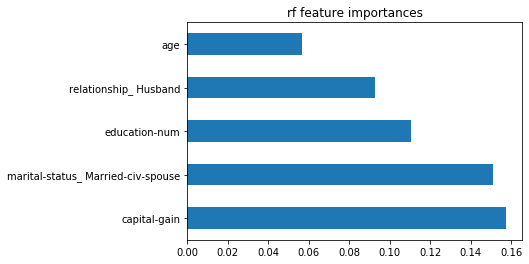

In [66]:
# 개별 feature들의 중요도를 시각화해주세요.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
feat_importance=pd.Series(best_rf.feature_importances_,index=X_train.columns)
feat_importance.nlargest(5).plot(kind='barh')
plt.title('rf feature importances')
plt.show()

#### 50개의 변수에 대한 200개의 관측치를 갖는 데이터 셋을 갖고 있다고 가정합시다. 랜덤 포레스트를 돌려 importance plot을 그리고 나서, 그 결과를 바탕으로 상위 10개의 변수를 이용하여 선형 회귀를 fit했다고 가정해봅시다. 이때 회귀 모델이 랜덤 포레스트에 비해 성능이 훨씬 안 좋았습니다. 이러한 결과가 도출된 이유(가능성)에 대해서 두 가지 이상 제시해주세요.

- 랜덤 포레스트에서 도출된 상위 10개의 변수는 해당 모델에 대해 관계가 있는 것이지 선형 회귀모델과는 관련이 없기 때문

- 타겟값과 feature importance에서 나온 변수는 함수적 관계가 존재하지 않는다. 


## Voting Ensemble

#### 1) 모델 불러오기 및 정의하기

In [67]:
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
#원하는 모델 3개를 골라 VotingClassifier을 돌려주세요.
#저는 성능 상관없이 모델을 가져왔는데 부담없이 원하시는 모델을 돌려주시면 됩니다ㅎㅎ


In [68]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
models=[('lgbm',LGBMClassifier()),
       ('xgbm',XGBClassifier()),
       ('svc',AdaBoostClassifier())]

soft_vote=VotingClassifier(models, voting='soft')
vote_cv=cross_validate(soft_vote,X_train,y_train,cv=5)

In [74]:
soft_vote.fit(X_train,y_train)
vote_pred=soft_vote.predict(X_test)
print(accuracy_score(pred,y_test))

0.8647763332992118


# 수고하셨습니다:)